<a href="https://colab.research.google.com/github/daveveed/Machine-Learning/blob/main/ANN_Regression_with_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np, pandas as pd, matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing

The objective is to predict the price of house using 8 different variables

In [4]:
housing = fetch_california_housing()

In [5]:
# print the independent variables
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

spliting

In [6]:
from sklearn.model_selection import  train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=1)

standadizng

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
X_train.shape[1]

8

In [9]:
np.random.seed(1)
tf.random.set_seed(1)

we will be using functional API not sequential 

In [10]:
from keras.api._v2.keras import activations
# building the model structure
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs = [output])

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [18]:
from keras.engine.training import optimizer
# compile the model
model.compile(loss = 'mean_squared_error', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=['mae'])

In [24]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4337 - mae: 0.4733 - val_loss: 0.4264 - val_mae: 0.4723
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4319 - mae: 0.4724 - val_loss: 0.4215 - val_mae: 0.4704
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4296 - mae: 0.4710 - val_loss: 0.4164 - val_mae: 0.4706
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4277 - mae: 0.4709 - val_loss: 0.4135 - val_mae: 0.4638
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4265 - mae: 0.4687 - val_loss: 0.4120 - val_mae: 0.4658
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4253 - mae: 0.4682 - val_loss: 0.4138 - val_mae: 0.4652
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4230 - mae: 0.4675 - val_loss: 0.4105 - val_mae: 0.4634
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [25]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4129 - mae: 0.4531


In [26]:
model_history.history

{'loss': [0.43369171023368835,
  0.431871235370636,
  0.4296186566352844,
  0.42774248123168945,
  0.42651858925819397,
  0.4252835512161255,
  0.4229722321033478,
  0.42088326811790466,
  0.42019587755203247,
  0.41812628507614136,
  0.4170253276824951,
  0.41505667567253113,
  0.4139396846294403,
  0.4125841557979584,
  0.4111444056034088,
  0.409821093082428,
  0.4084743857383728,
  0.4066609740257263,
  0.4057827889919281,
  0.4044336974620819,
  0.40345826745033264,
  0.40154996514320374,
  0.4005703032016754,
  0.3993947505950928,
  0.3982318043708801,
  0.3971969485282898,
  0.3959026038646698,
  0.39497870206832886,
  0.3938557803630829,
  0.39243388175964355],
 'mae': [0.4733007848262787,
  0.47237351536750793,
  0.4710439443588257,
  0.4709198772907257,
  0.4687364995479584,
  0.46824562549591064,
  0.4674753248691559,
  0.4659675657749176,
  0.4653179347515106,
  0.4639836549758911,
  0.463559091091156,
  0.46219831705093384,
  0.4617635905742645,
  0.46043089032173157,
  0.

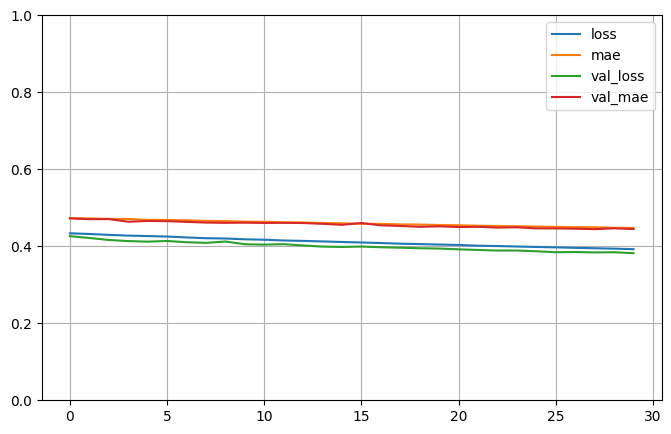

In [27]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## saving the model

In [28]:
model.save('my_model.h5') # the .h5 is the extension format to save the model as

In [29]:
%pwd

'/content'

In [30]:
# delete the model
del model

In [31]:
#clear the session
keras.backend.clear_session()

In [32]:
model

NameError: ignored

In [33]:
#reload the model
model = keras.models.load_model('my_model.h5')

In [34]:
model

In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

## using call backs during training

with this we can save our training at a particular epoch 

In [36]:
del model

In [38]:
# create a new model to illustrate
keras.backend.clear_session()

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [40]:
model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [41]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Model-{epoch:02d}.h5')

In [42]:
history = model.fit(X_train,y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.0267 - val_loss: 0.7294
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 2.7845 - val_loss: 0.6195
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4726 - val_loss: 0.4304
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4147 - val_loss: 0.3945
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3937 - val_loss: 0.3892
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3814 - val_loss: 0.3681
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3704 - val_loss: 0.3578
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3630 - val_loss: 0.3523
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3577 - val_loss: 0.3479
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3514 - val_loss: 0.3457

In [43]:
# del the model
del model
keras.backend.clear_session()

In [44]:
# now we can load any of the epochs
model = keras.models.load_model('Model-10.h5') #this is loading the 10th epoch

In [45]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 7ms/step - loss: 0.3756


## choosing the best model

- there's no need to save the model at each epoch
- we will set the save best to true while creating the check point
- it only saves the best one







In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [47]:
model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Best_MOdel.h5', save_best_only=True)

In [49]:
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data=(X_valid, y_valid),
                    callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 4s 8ms/step - loss: 1.1430 - val_loss: 1.5045
Epoch 2/10
363/363 [==============================] - 4s 10ms/step - loss: 0.6949 - val_loss: 0.4568
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4416 - val_loss: 0.4269
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4154 - val_loss: 0.3943
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3948 - val_loss: 0.3857
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3806 - val_loss: 0.3655
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3702 - val_loss: 0.3606
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3631 - val_loss: 0.3508
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3578 - val_loss: 0.3451
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3511 - val_loss: 0.343

In [50]:
model = keras.models.load_model('Best_MOdel.h5')
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3663


### early stopping callback

when we have large epoch and the validation accuracy, and select the nest model.

In [51]:
del model

In [52]:
keras.backend.clear_session()

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation= 'relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [54]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [55]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('early_stop_model.h5', save_best_only=True)

In [56]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience =10,
                                                  restore_best_weights= True) 
#patience is the no of epochs with no improvement after which training will be stopped

In [57]:
history = model.fit(X_train, y_train, epochs = 200,
                    validation_data =(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 3s 7ms/step - loss: 2.0136 - val_loss: 0.7592
Epoch 2/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6773 - val_loss: 0.5795
Epoch 3/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5960 - val_loss: 0.5426
Epoch 4/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5667 - val_loss: 0.5176
Epoch 5/200
363/363 [==============================] - 2s 4ms/step - loss: 0.5459 - val_loss: 0.5020
Epoch 6/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5297 - val_loss: 0.4900
Epoch 7/200
363/363 [==============================] - 2s 4ms/step - loss: 0.5166 - val_loss: 0.4806
Epoch 8/200
363/363 [==============================] - 2s 5ms/step - loss: 0.5059 - val_loss: 0.4719
Epoch 9/200
363/363 [==============================] - 3s 9ms/step - loss: 0.4979 - val_loss: 0.4653
Epoch 10/200
363/363 [==============================] - 3s 9ms/step - loss: 0.4903 - val_lo

In [59]:
model = keras.models.load_model('early_stop_model.h5')
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3405
